# Project Overview

Using what youu have learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City porperty market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

<ol>
    <li>BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2),        Brooklyn (3), Queens (4), and Staten Island (5).</li>
    <li>BLOCK; LOT :The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.</li>
    <li>BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: : The type of building at various points in time.</li>
</ol>

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

<ol>
    <li>Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.</li>
    <li>This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Membaca dataset
df_nyc_sales = pd.read_csv('./nyc-rolling-sales.csv')

# Menampilkan dataset
df_nyc_sales

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Calculate Rows and Columns

In [3]:
# Menghitung jumlah baris dan kolom
rows, columns = df_nyc_sales.shape

# Menampilkan jumlah baris
print(rows, "Rows")

# Menampilkan jumlah kolom
print(columns, "Columns")

84548 Rows
22 Columns


# Information Dataset

In [4]:
# Melihat informasi tentang dataset
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Data Preprocessing

# Check for Missing Values in Dataset

In [5]:
# mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('./nyc-rolling-sales.csv', na_values=missing_values)

In [6]:
# Mengetahui missing values dalam kolom yang disediakan oleh dataset.
df_nyc_sales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

# Drop Columns

In [7]:
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [8]:
# drop columns yang tidak dibutuhkan untuk proses analisis
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER', 'ZIP CODE']
df_nyc_sales.drop(unnecessary_columns,inplace=True, axis=1)

# Handling Missing Value

In [9]:
# drop missing value
df_nyc_sales.dropna(inplace=True)

In [10]:
# melihat informasi dari dataset
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41424 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         41424 non-null  int64  
 1   NEIGHBORHOOD                    41424 non-null  object 
 2   BUILDING CLASS CATEGORY         41424 non-null  object 
 3   TAX CLASS AT PRESENT            41424 non-null  object 
 4   BLOCK                           41424 non-null  int64  
 5   LOT                             41424 non-null  int64  
 6   BUILDING CLASS AT PRESENT       41424 non-null  object 
 7   RESIDENTIAL UNITS               41424 non-null  int64  
 8   COMMERCIAL UNITS                41424 non-null  int64  
 9   TOTAL UNITS                     41424 non-null  float64
 10  LAND SQUARE FEET                41424 non-null  float64
 11  GROSS SQUARE FEET               41424 non-null  float64
 12  YEAR BUILT                      41424

# Drop Duplikasi

In [11]:
# menghitung jumlah data duplikat
sum(df_nyc_sales.duplicated())

335

In [12]:
# drop data duplikat
df_nyc_sales = df_nyc_sales.drop_duplicates()

In [13]:
# menghitung jumlah data duplikat
sum(df_nyc_sales.duplicated())

0

In [14]:
# melihat informasi dari dataset
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41089 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         41089 non-null  int64  
 1   NEIGHBORHOOD                    41089 non-null  object 
 2   BUILDING CLASS CATEGORY         41089 non-null  object 
 3   TAX CLASS AT PRESENT            41089 non-null  object 
 4   BLOCK                           41089 non-null  int64  
 5   LOT                             41089 non-null  int64  
 6   BUILDING CLASS AT PRESENT       41089 non-null  object 
 7   RESIDENTIAL UNITS               41089 non-null  int64  
 8   COMMERCIAL UNITS                41089 non-null  int64  
 9   TOTAL UNITS                     41089 non-null  float64
 10  LAND SQUARE FEET                41089 non-null  float64
 11  GROSS SQUARE FEET               41089 non-null  float64
 12  YEAR BUILT                      41089

# Change the data type of each column according to the type.

In [15]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [16]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41089 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         41089 non-null  object 
 1   NEIGHBORHOOD                    41089 non-null  object 
 2   BUILDING CLASS CATEGORY         41089 non-null  object 
 3   TAX CLASS AT PRESENT            41089 non-null  object 
 4   BLOCK                           41089 non-null  int64  
 5   LOT                             41089 non-null  int64  
 6   BUILDING CLASS AT PRESENT       41089 non-null  object 
 7   RESIDENTIAL UNITS               41089 non-null  int64  
 8   COMMERCIAL UNITS                41089 non-null  int64  
 9   TOTAL UNITS                     41089 non-null  float64
 10  LAND SQUARE FEET                41089 non-null  float64
 11  GROSS SQUARE FEET               41089 non-null  float64
 12  YEAR BUILT                      41089

# Remove Outliers

In [17]:
# Filter kolom-kolom numerik
numerical_columns = df_nyc_sales.select_dtypes(include=['number'])

# Hitung kuartil 1 dan kuartil 3 setiap kolom pada data numerik
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Hitung IQR (interquartile range) setiap kolom pada data numerik
IQR = Q3 - Q1

# Definisikan batas bawah dan batas atas setiap kolom pada data numerik
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus data yang melebihi batas bawah atau batas atas pada setiap kolom
df_filtered = df_nyc_sales[~((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)]

# Lakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan
df_filtered = df_filtered.reset_index(drop=True)

# Tampilkan informasi tentang jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data awal: {len(df_nyc_sales)}")
print(f"Jumlah data setelah penghapusan outliers: {len(df_filtered)}")

df_nyc_sales = df_filtered

Jumlah data awal: 41089
Jumlah data setelah penghapusan outliers: 25764


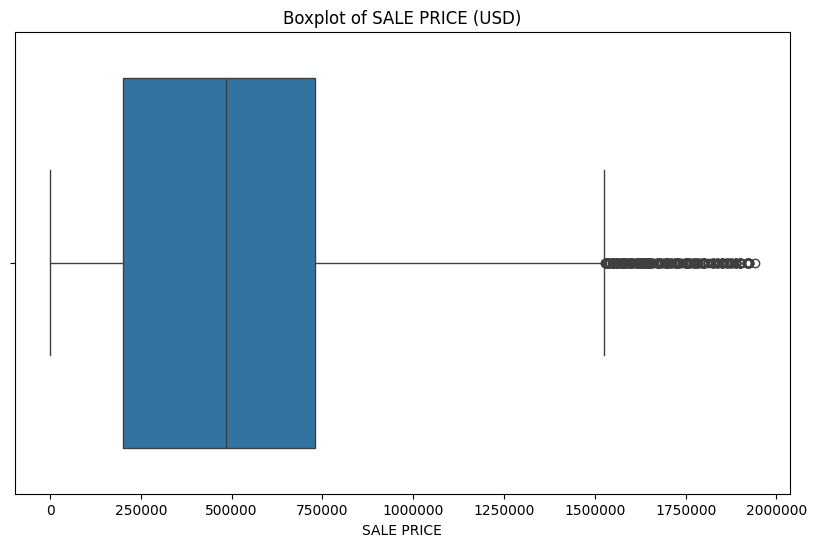

In [18]:
# plot curve using boxplot to see another view of the data
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df_nyc_sales)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of SALE PRICE (USD)")
plt.show()

Data distribusi sudah tidak ada outliers

In [19]:
df_nyc_sales

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,1,0,1.0,384.0,1152.0,1901.0,1,A5,1375000.0,2016-10-07 00:00:00
1,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1960,41,A9,1,0,1.0,1665.0,3200.0,1910.0,1,A9,1510000.0,2017-01-03 00:00:00
2,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2041,126,A9,1,0,1.0,1699.0,3536.0,1901.0,1,A9,1595790.0,2017-08-31 00:00:00
3,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2051,62,A4,1,0,1.0,2000.0,3360.0,1899.0,1,A4,1000000.0,2016-09-29 00:00:00
4,1,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1754,116,B1,2,0,2.0,1231.0,3240.0,1899.0,1,B1,1550000.0,2017-03-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25759,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,131,B9,2,0,2.0,4700.0,2170.0,1998.0,1,B9,408092.0,2016-09-26 00:00:00
25760,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2.0,3325.0,1300.0,1995.0,1,B2,509000.0,2016-10-31 00:00:00
25761,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
25762,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00


Ploting menggunakan kurva boxplot dapat di lihat data distribusi sudah tidak ada outliers

# Measure of Tendency Central and Measure of Spread

In [20]:
# memunculkan semua hasil statistik describe
df_nyc_sales.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,25764,25764,25764,25764,25764.000000,25764.000000,25764,25764.000000,25764.0,25764.000000,25764.000000,25764.000000,25764,25764,25764,2.576400e+04,25764
unique,5,202,10,3,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,119,3,22,NaN,355
top,3,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,1920.0,1,A1,NaN,2016-09-30 00:00:00
freq,9964,695,11570,25738,NaN,NaN,4246,NaN,NaN,NaN,NaN,NaN,3281,25757,4242,NaN,176
mean,NaN,NaN,NaN,NaN,5621.060782,44.559929,NaN,1.676021,0.0,1.676021,2661.826036,1904.152344,NaN,NaN,NaN,5.044647e+05,NaN
std,NaN,NaN,NaN,NaN,3323.566317,33.495886,NaN,0.686588,0.0,0.686588,993.161804,734.171384,NaN,NaN,NaN,3.971994e+05,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,NaN,1.000000,0.0,1.000000,200.000000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3267.000000,20.000000,NaN,1.000000,0.0,1.000000,2000.000000,1336.000000,NaN,NaN,NaN,2.000000e+05,NaN
50%,NaN,NaN,NaN,NaN,5172.000000,37.000000,NaN,2.000000,0.0,2.000000,2433.000000,1768.000000,NaN,NaN,NaN,4.850000e+05,NaN
75%,NaN,NaN,NaN,NaN,7715.250000,61.000000,NaN,2.000000,0.0,2.000000,3142.000000,2323.250000,NaN,NaN,NaN,7.300000e+05,NaN


# Mean

In [21]:
# mencari mean gross square feet
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())

Mean GROSS SQUARE FEET =  1904.1523443564663


# Median

In [22]:
# mencari median gross square feet
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())

Median GROSS SQUARE FEET =  1768.0


# Modus

In [23]:
# mencari modus building class category
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus "+col+" = ",df_nyc_sales[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  A1
Modus BUILDING CLASS AT TIME OF SALE =  A1


# Measure of Spread

# Range

In [24]:
# mencari range sale price
print('Range SALE PRICE = ', (df_nyc_sales['SALE PRICE'].max() - df_nyc_sales['SALE PRICE'].min()))

Range SALE PRICE =  1940000.0


In [25]:
# mencari range Gross square
print('Range GROSS SQUARE FEET = ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))

Range GROSS SQUARE FEET =  4875.0


# Variance

In [26]:
print('Sampel Variance dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1))

Sampel Variance dari SALE PRICE =  157767340039.0845


In [27]:
print('Sampel Variance dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))

Sampel Variance dari GROSS SQUARE FEET =  539007.6205041494


# Standard Deviation

In [28]:
# mencari standard deviation dari LOT
print('Standard Deviation dari LOT = ', df_nyc_sales['LOT'].std())

Standard Deviation dari LOT =  33.49588631636889


# Propability Distribution

Penerapan Distribusi Probabilitas digunakan untuk menganalisis pola distribusi pada kolom 'GROSS SQUARE FEET'.

# Normal Distribution

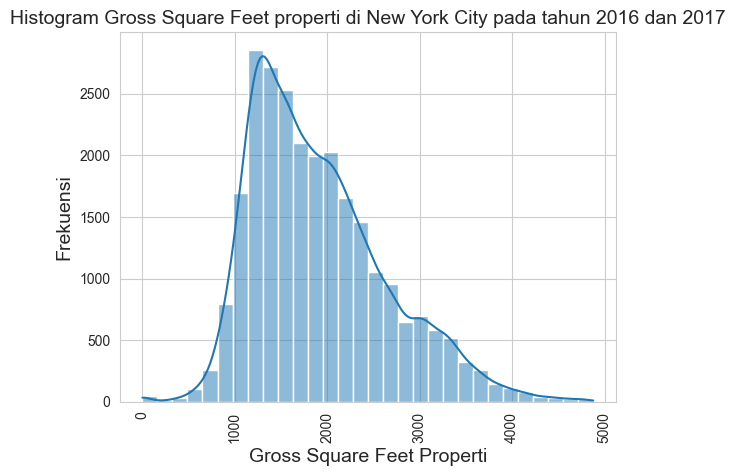

In [29]:
# menentukan style plot
sns.set_style('whitegrid')

# membuat histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017
sns.histplot(data=df_nyc_sales, x='GROSS SQUARE FEET', bins=30, kde=True)
plt.title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
plt.xlabel('Gross Square Feet Properti', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Dari visualisasi histogram diatas memiliki jenis skew ke kiri, untuk mengatasi hal tersebut perlu adanya transformasi data untuk memperbaikinya

# Handling Skew

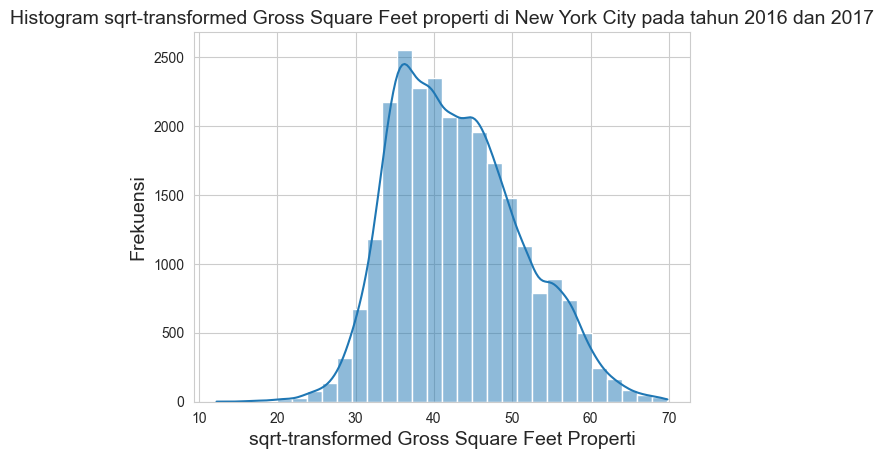

In [30]:
# Menghilangkan nilai 0 dari data
df_nyc_sales = df_nyc_sales[df_nyc_sales['GROSS SQUARE FEET'] > 0]

# Melakukan sqrt-transform pada data
sqrt_data = np.sqrt(df_nyc_sales['GROSS SQUARE FEET'])

# Membuat histogram dari sqrt-transformed data
sns.set_style('whitegrid')
sns.histplot(data=sqrt_data, bins=30, kde=True)
plt.title('Histogram sqrt-transformed Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
plt.xlabel('sqrt-transformed Gross Square Feet Properti', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

# Mengecek Nilai Skew

In [31]:
# Menghitung nilai skewed pada data sqrt-transformed
skew = sqrt_data.skew()

print("Nilai skewness pada data sqrt-transformed: {:.2f}".format(skew))

Nilai skewness pada data sqrt-transformed: 0.40


# Confidence Intervals

Implementasi Confidence Intervals untuk melihat 'SALE PRICE' di New York City pada tahun 2016 dan 2017

# Mengganti Nilai 0 Dengan Nilai Median

In [32]:
# Mencari nilai median dari kolom 'SALE PRICE'
median_price = df_nyc_sales['SALE PRICE'].median()

# Mengganti nilai 0 dengan nilai median
df_nyc_sales['SALE PRICE'] = df_nyc_sales['SALE PRICE'].replace(0, median_price)

# Histogram Untuk Confidence Interval

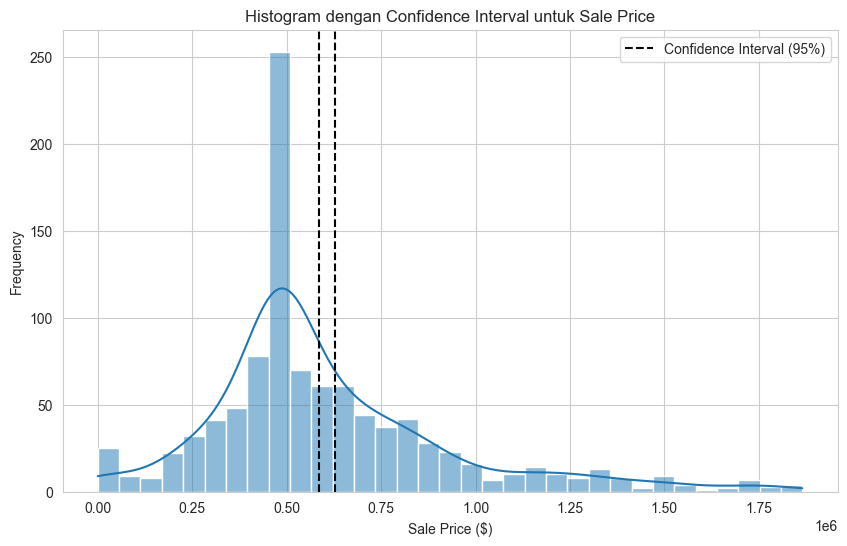

In [33]:
# Ambil sampel data dari dataset
sample_data = df_nyc_sales.sample(n=1000, random_state=42)

# Hitung mean dan standard deviation dari sample
mean = sample_data['SALE PRICE'].mean()
std_dev = sample_data['SALE PRICE'].std()

# Hitung confidence interval
n = len(sample_data)
z = 1.96  # Z-score untuk confidence level 95%
ci_low = mean - (z * std_dev / np.sqrt(n))
ci_high = mean + (z * std_dev / np.sqrt(n))

# Buat histogram dengan garis vertikal menunjukkan confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_data, x='SALE PRICE', kde=True)
plt.axvline(x=ci_low, color='black', linestyle='--', label='Confidence Interval (95%)')
plt.axvline(x=ci_high, color='black', linestyle='--')

# Tambahkan label dan judul plot
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram dengan Confidence Interval untuk Sale Price')
plt.legend()

plt.show()

# Hypothesis Testing

Apakah harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lain di New York City?

In [34]:
from scipy.stats import ttest_ind

# Pisahkan data Manhattan dan boroughs lainnya
manhattan = df_nyc_sales[df_nyc_sales['BOROUGH'] == 1]
other_boroughs = df_nyc_sales[df_nyc_sales['BOROUGH'].isin([2, 3, 4, 5])]

# Lakukan two-sample t-test dengan mengasumsikan varian yang tidak sama
t, p = ttest_ind(manhattan['SALE PRICE'], other_boroughs['SALE PRICE'], equal_var=False)

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Cetak hasil t-test
print(f"Nilai t-statistic: {t}")
print(f"Nilai p-value: {p}")

if p < alpha:
    print('Tolak hipotesis: Harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lainnya')
else:
    print('Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya')

Nilai t-statistic: nan
Nilai p-value: nan
Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya


# Overall Analysis

1. Kesimpulan dari Measure of Tendency Central and Measure of Spread yaitu :

In [35]:
df_nyc_sales.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,25715,25715,25715,25715,25715.000000,25715.000000,25715,25715.000000,25715.0,25715.000000,25715.000000,25715.000000,25715,25715,25715,2.571500e+04,25715
unique,5,202,9,2,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,118,3,21,NaN,355
top,3,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,1920.0,1,A1,NaN,2016-09-30 00:00:00
freq,9927,692,11567,25712,NaN,NaN,4246,NaN,NaN,NaN,NaN,NaN,3273,25709,4242,NaN,176
mean,NaN,NaN,NaN,NaN,5622.209178,44.558312,NaN,1.675287,0.0,1.675287,2661.557573,1907.780712,NaN,NaN,NaN,5.971776e+05,NaN
std,NaN,NaN,NaN,NaN,3325.609683,33.497282,NaN,0.686106,0.0,0.686106,992.955426,730.145426,NaN,NaN,NaN,3.165250e+05,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,NaN,1.000000,0.0,1.000000,200.000000,150.000000,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3266.500000,20.000000,NaN,1.000000,0.0,1.000000,2000.000000,1340.000000,NaN,NaN,NaN,4.400000e+05,NaN
50%,NaN,NaN,NaN,NaN,5172.000000,37.000000,NaN,2.000000,0.0,2.000000,2433.000000,1771.000000,NaN,NaN,NaN,4.850000e+05,NaN
75%,NaN,NaN,NaN,NaN,7717.500000,61.000000,NaN,2.000000,0.0,2.000000,3142.000000,2325.000000,NaN,NaN,NaN,7.300000e+05,NaN


2. Propability Distribution digunakan untuk melihat distribusi dari kolom 'GROSS SQUARE FEET' berada di rentang 2400 ~ 2600
3. Confidence Intervals 'SALE PRICE' di New York City pada tahun 2016 dan 2017 berada di rentang sekitar 5.6 ~ 5.8 atau 560.000 ~ 580.000 US Dolar
4. Hipotesis testing yang muncul untuk pertanyaan *Apakah harga properti di Manhattan secara signifikan lebih tinggi daripada harga properti di borough lain di New York City?* menghasilkan hipotesis *Terima hipotesis: Harga properti di Manhattan tidak secara signifikan lebih tinggi daripada harga properti di borough lainnya*